In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [3]:
data = pd.read_csv('./data/train.csv')

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(data)

In [9]:
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [10]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [11]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [12]:
 W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 700)

Iteration:  0
[7 9 9 ... 9 9 9] [3 9 6 ... 2 3 9]
0.1215609756097561
Iteration:  10
[7 9 9 ... 2 9 9] [3 9 6 ... 2 3 9]
0.14480487804878048
Iteration:  20
[7 9 9 ... 2 9 9] [3 9 6 ... 2 3 9]
0.16987804878048782
Iteration:  30
[7 9 9 ... 2 9 9] [3 9 6 ... 2 3 9]
0.20185365853658538
Iteration:  40
[7 9 9 ... 2 9 9] [3 9 6 ... 2 3 9]
0.24446341463414634
Iteration:  50
[7 9 9 ... 2 9 9] [3 9 6 ... 2 3 9]
0.30390243902439024
Iteration:  60
[7 9 9 ... 2 3 9] [3 9 6 ... 2 3 9]
0.3515609756097561
Iteration:  70
[7 9 9 ... 2 3 9] [3 9 6 ... 2 3 9]
0.38495121951219513
Iteration:  80
[9 9 9 ... 2 3 9] [3 9 6 ... 2 3 9]
0.4161951219512195
Iteration:  90
[9 9 9 ... 2 3 7] [3 9 6 ... 2 3 9]
0.4624878048780488
Iteration:  100
[9 9 5 ... 2 3 7] [3 9 6 ... 2 3 9]
0.5537804878048781
Iteration:  110
[9 9 6 ... 2 3 7] [3 9 6 ... 2 3 9]
0.5842195121951219
Iteration:  120
[9 9 6 ... 2 3 9] [3 9 6 ... 2 3 9]
0.6055609756097561
Iteration:  130
[9 9 6 ... 2 3 9] [3 9 6 ... 2 3 9]
0.6252682926829268
Iteration: 

In [13]:
def make_prediction(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_prediction(X_train[:, index, None], W1, b1, W2, b2 )
    label = Y_train[index]
    print("Prediction:", prediction)
    print('Label: ', label)
    
    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image,interpolation= 'nearest')
    plt.show()

Prediction: [9]
Label:  3


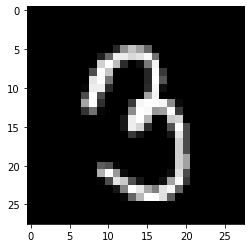

Prediction: [3]
Label:  3


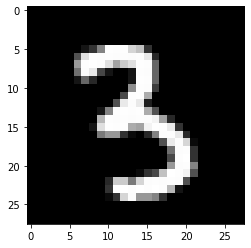

Prediction: [2]
Label:  0


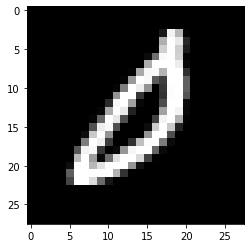

Prediction: [6]
Label:  5


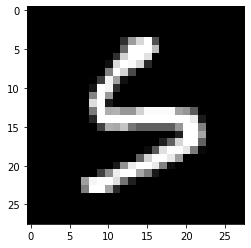

In [14]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)
test_prediction(10,W1, b1, W2, b2)

In [15]:
dev_predictions = make_prediction(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[8 5 1 6 3 2 6 5 5 4 2 8 4 7 3 4 3 5 9 5 8 5 7 0 5 9 6 3 3 2 4 1 4 2 5 0 5
 8 7 2 5 0 2 8 5 5 4 6 7 3 4 1 1 8 2 6 2 2 5 9 3 1 3 4 8 9 6 9 1 5 2 1 0 2
 2 9 0 1 7 2 1 5 8 5 8 2 2 1 4 6 4 9 7 3 0 1 8 8 5 8 7 3 6 4 7 5 1 7 5 1 9
 3 5 8 8 3 2 5 1 3 6 1 5 4 8 8 9 3 2 7 0 0 7 9 0 7 4 1 9 6 1 6 1 7 7 2 1 0
 6 0 1 0 3 5 9 8 4 7 9 1 9 2 4 0 5 1 6 8 8 1 5 4 3 4 2 5 7 8 6 2 7 6 3 7 9
 5 9 2 0 6 1 7 1 2 6 5 0 7 8 3 5 4 1 5 7 4 4 8 4 7 6 1 3 4 6 2 8 7 9 9 3 8
 4 8 6 0 9 1 2 2 7 9 0 4 2 7 1 3 3 9 4 1 2 3 6 6 9 5 5 3 9 0 8 9 8 2 8 8 6
 7 0 6 1 3 4 4 3 5 9 1 7 8 1 7 6 2 9 8 7 7 9 9 8 4 5 5 4 7 9 4 4 8 7 4 2 3
 1 9 7 0 1 7 0 3 2 5 2 2 4 0 5 6 0 8 9 5 2 4 8 3 1 5 3 6 0 6 5 7 8 3 7 9 5
 7 0 0 4 8 9 6 8 5 6 9 4 0 2 6 6 3 3 4 7 6 1 5 0 3 6 9 4 0 5 3 3 6 2 3 9 0
 8 6 4 7 6 0 8 9 9 5 9 9 4 1 2 4 8 0 7 9 5 1 3 7 4 7 9 6 6 3 0 1 5 9 1 2 6
 4 9 4 2 3 8 2 7 7 4 1 2 1 7 2 4 6 6 2 7 3 3 0 6 4 3 3 1 4 3 5 5 3 3 5 8 9
 9 1 2 8 1 8 0 6 5 0 2 2 9 2 1 3 0 7 0 8 7 5 2 4 1 9 9 5 7 4 2 7 6 7 5 2 6
 9 4 5 6 3 3 6 8 5 7 9 7 

0.845